In [64]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
companies = [f"company_{i}" for i in range(1, 21)]

company_data = []

for company in companies:
  for year in range(2021, 2024):
    for month in range(1, 13):
      company_data.append({
      "company": company,
      "year": year,
      "month": month,
      "revenue": random.randint(100, 200),
      "income": random.randint(1, 100)
      })

In [66]:
df = pd.DataFrame(company_data)
print(df)

        company  year  month  revenue  income
0     company_1  2021      1      137      27
1     company_1  2021      2      143      15
2     company_1  2021      3      128      90
3     company_1  2021      4      190      79
4     company_1  2021      5      145       6
..          ...   ...    ...      ...     ...
715  company_20  2023      8      129       2
716  company_20  2023      9      136      35
717  company_20  2023     10      120      72
718  company_20  2023     11      135      92
719  company_20  2023     12      171       7

[720 rows x 5 columns]


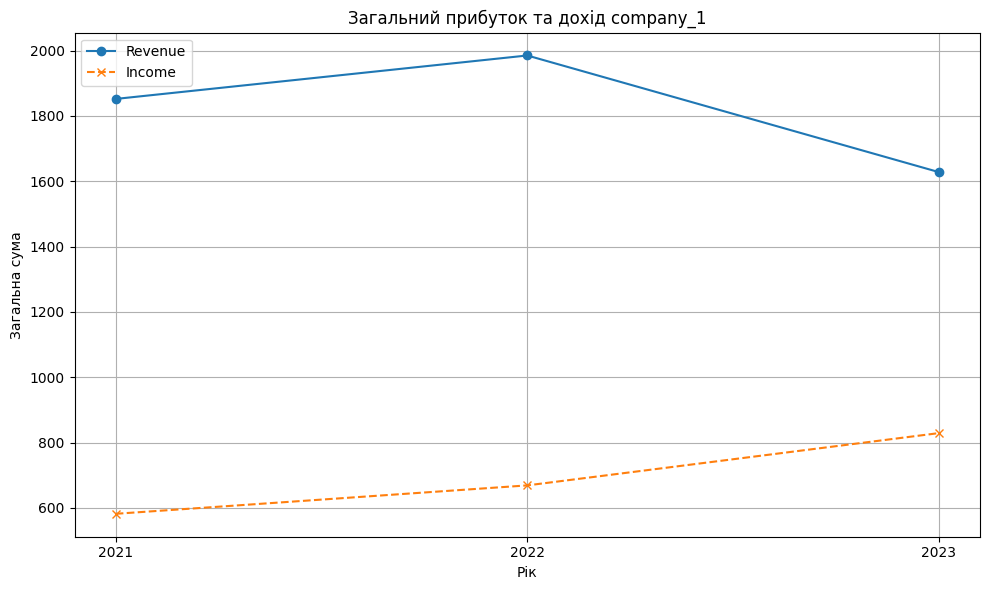

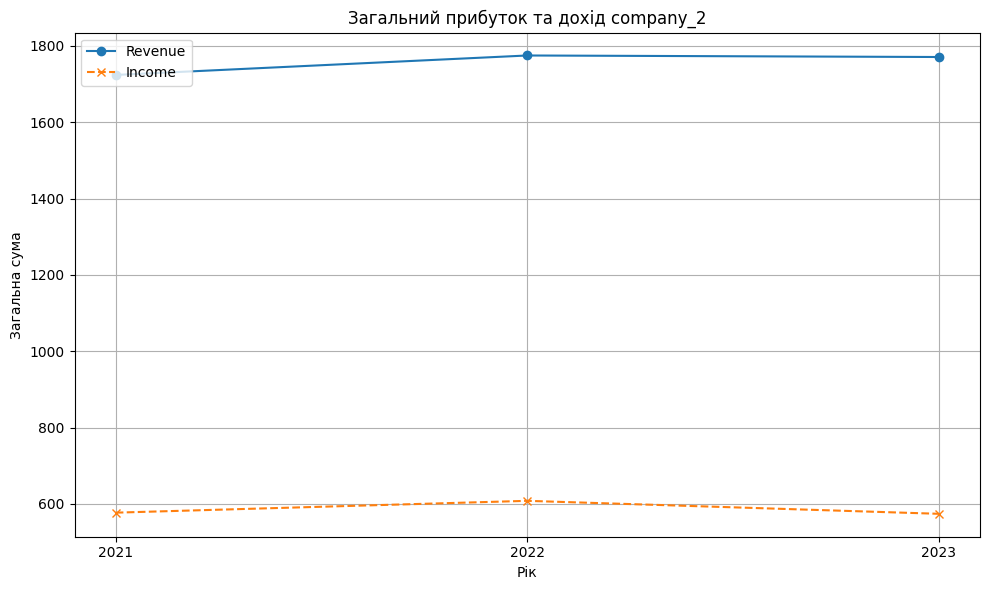

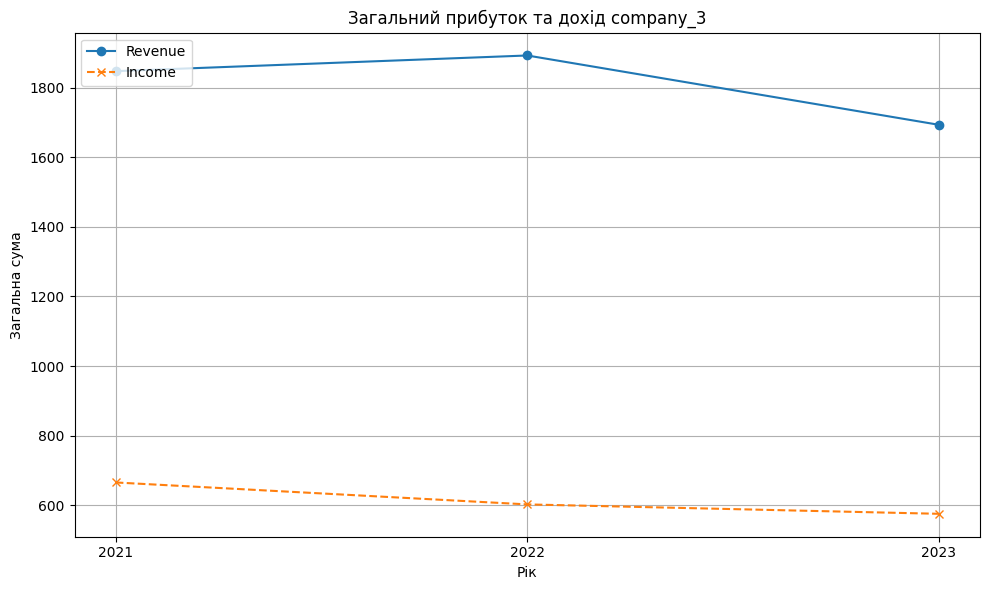

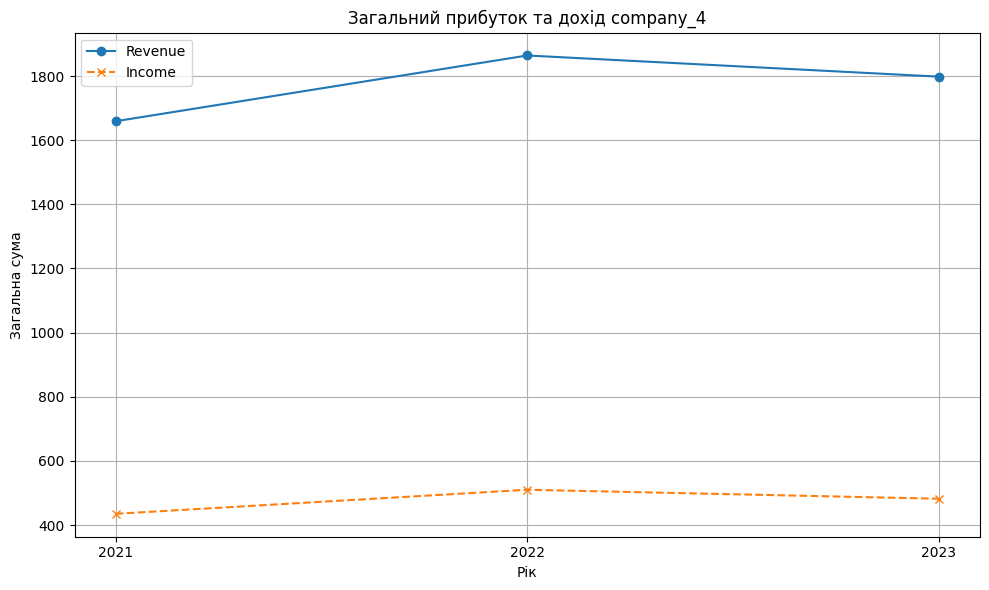

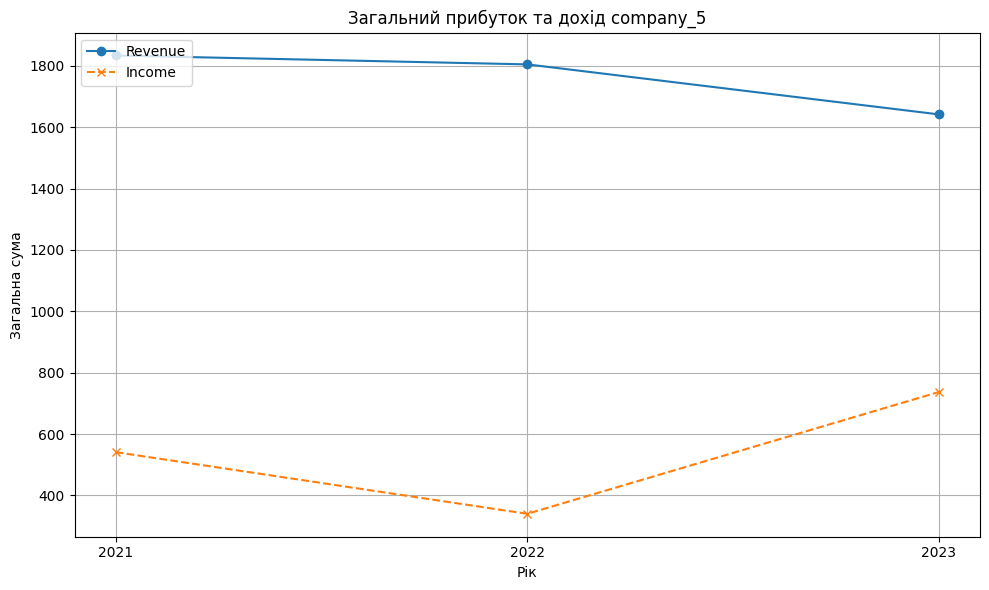

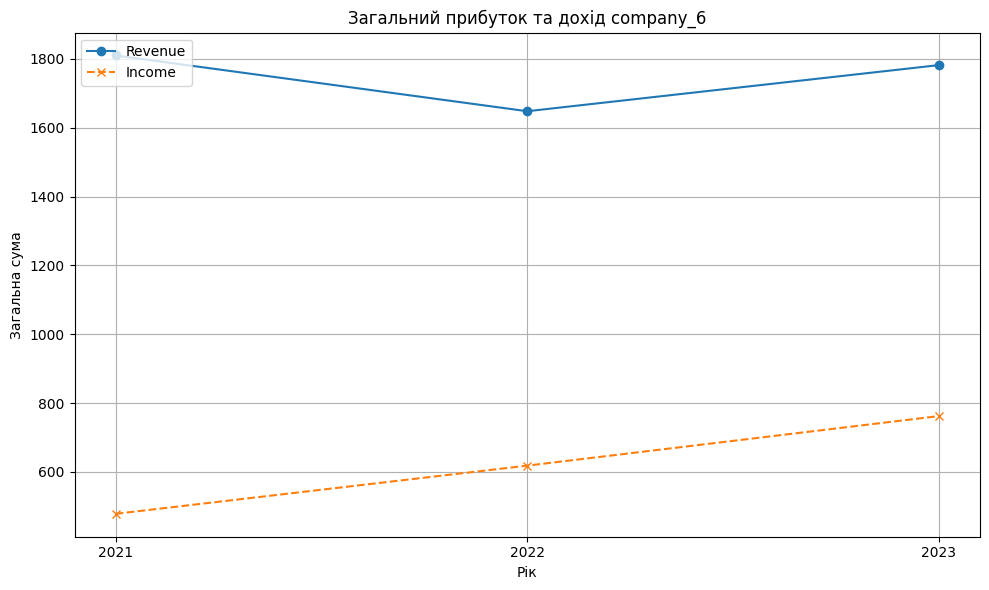

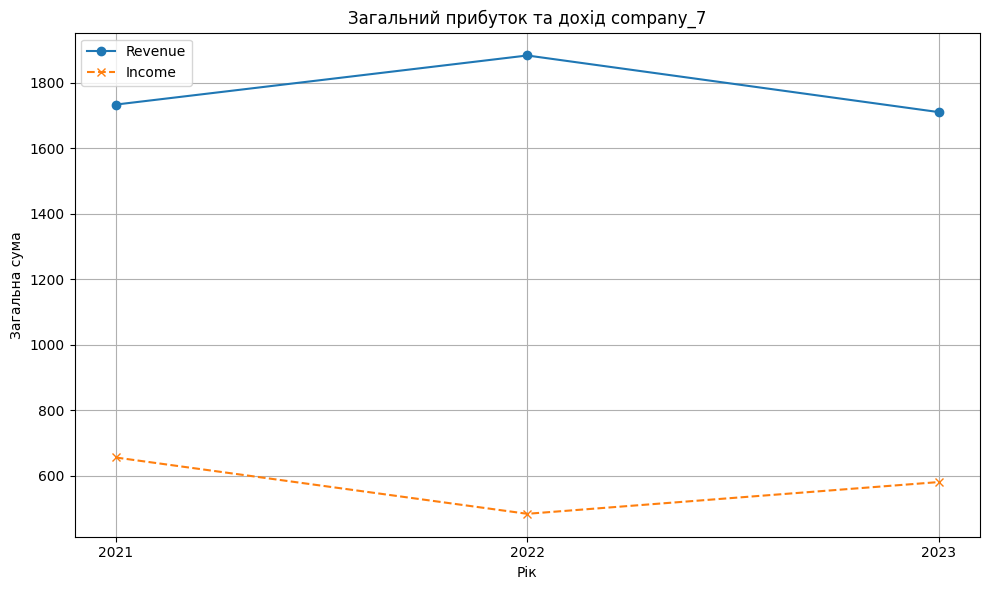

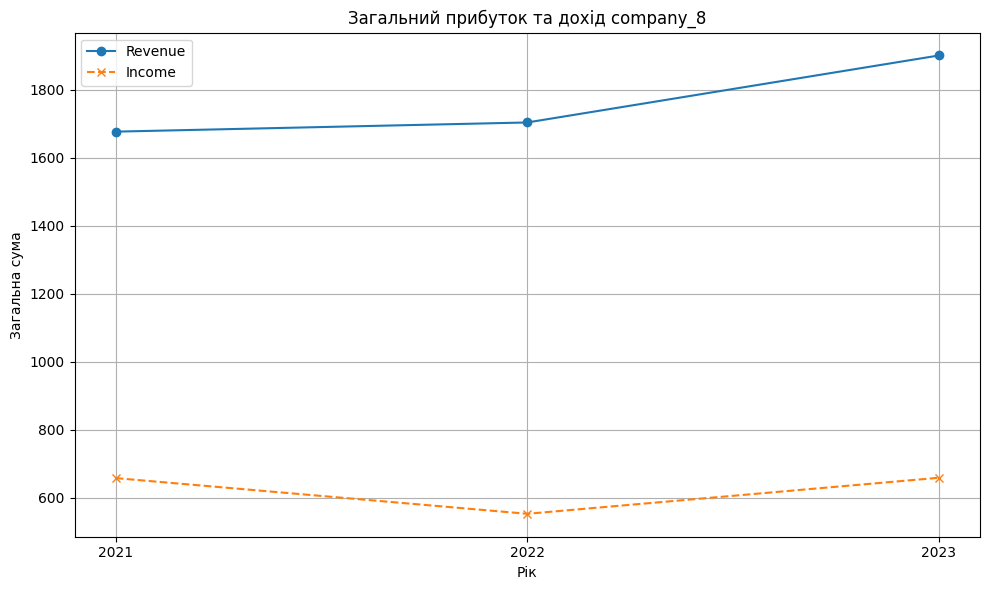

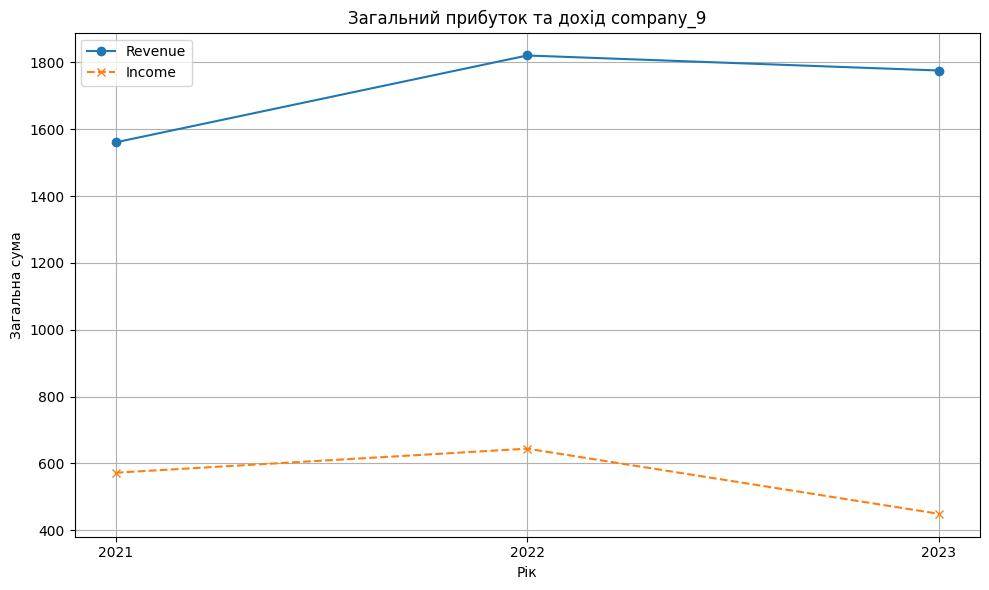

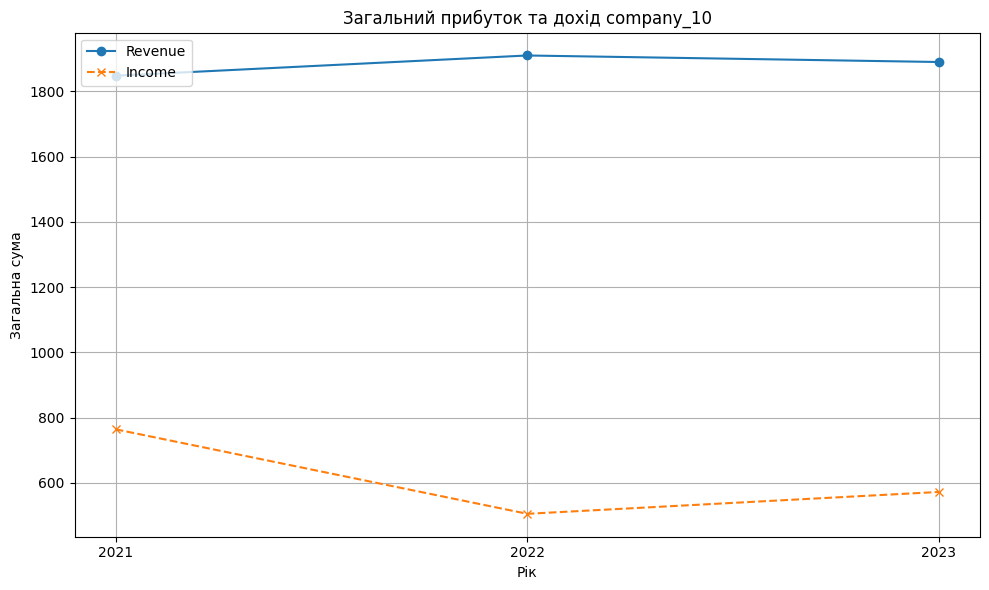

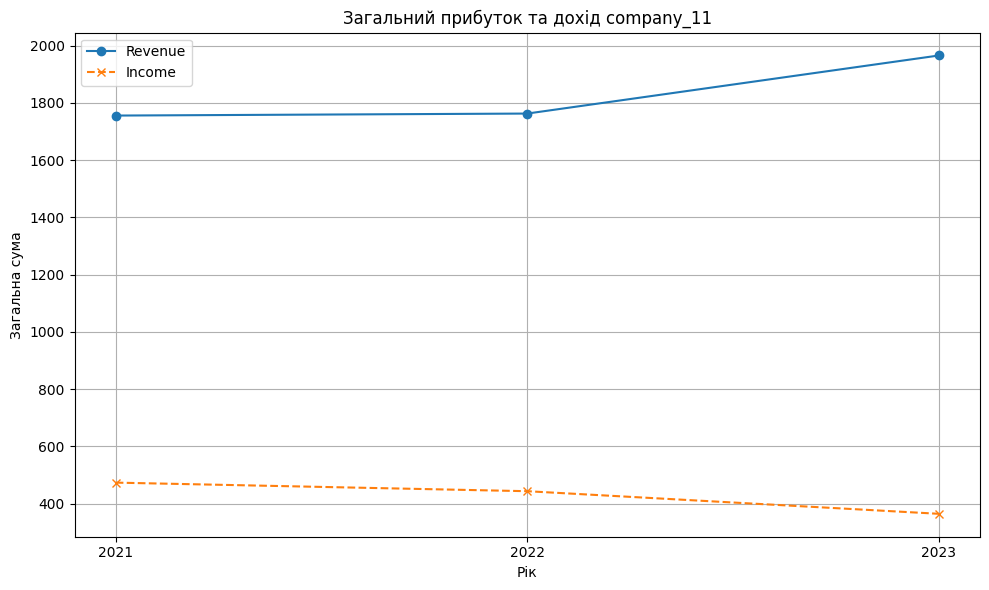

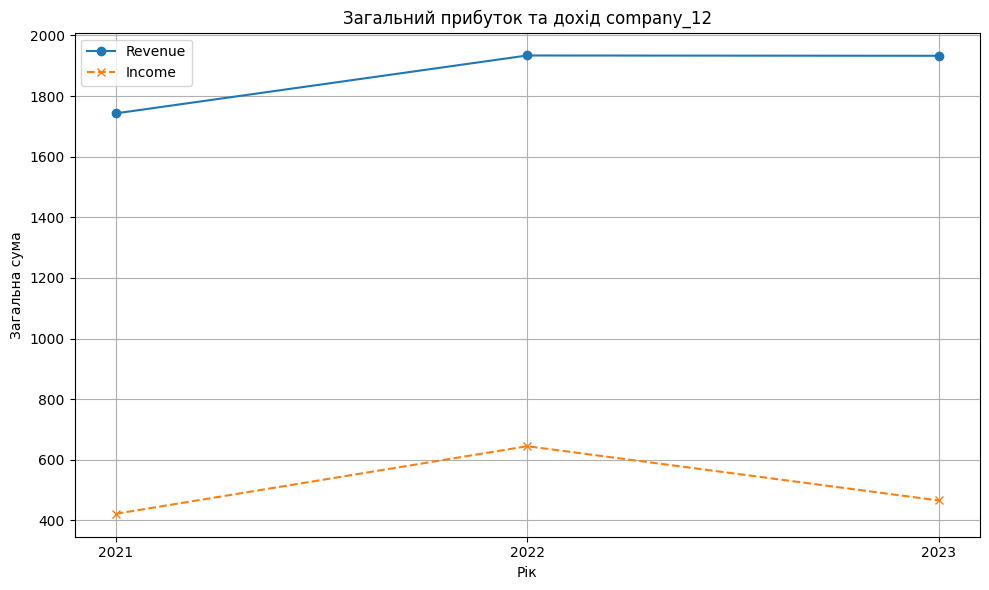

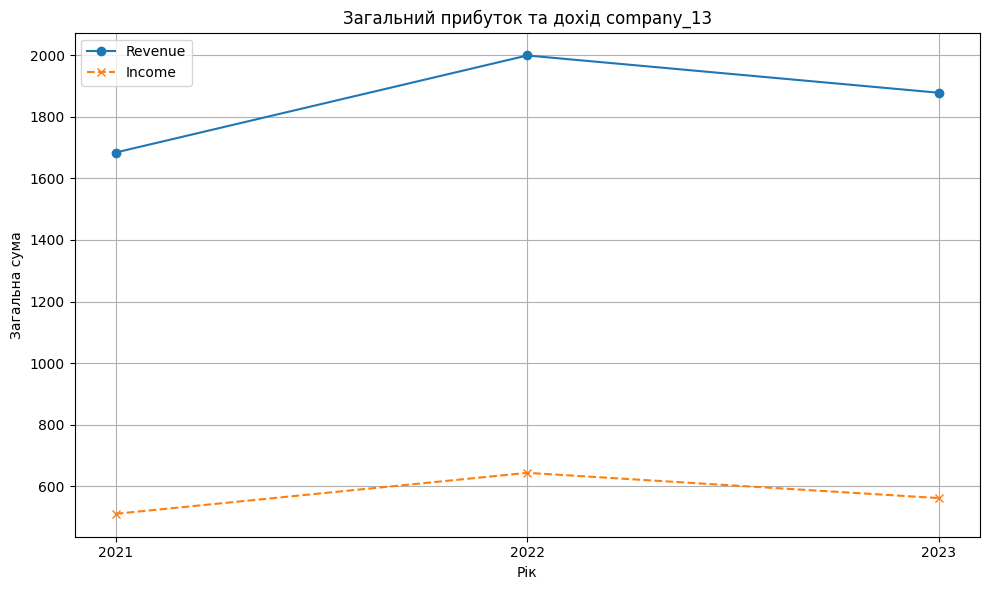

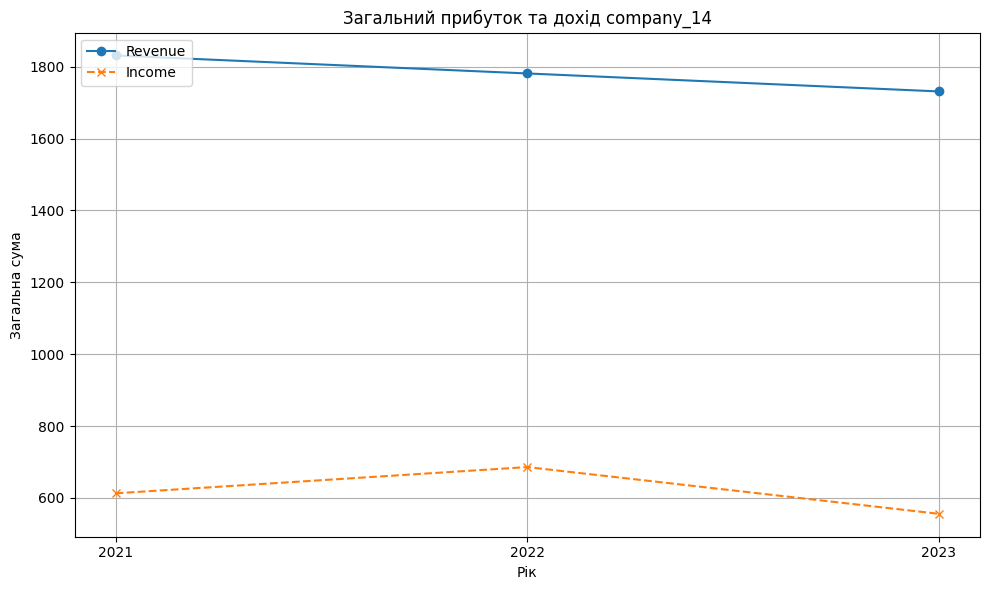

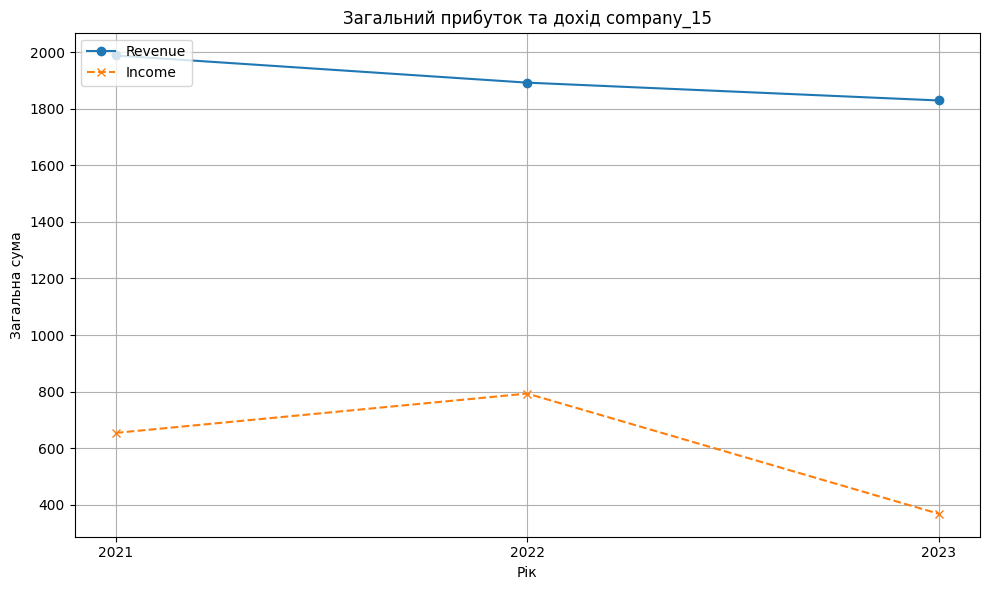

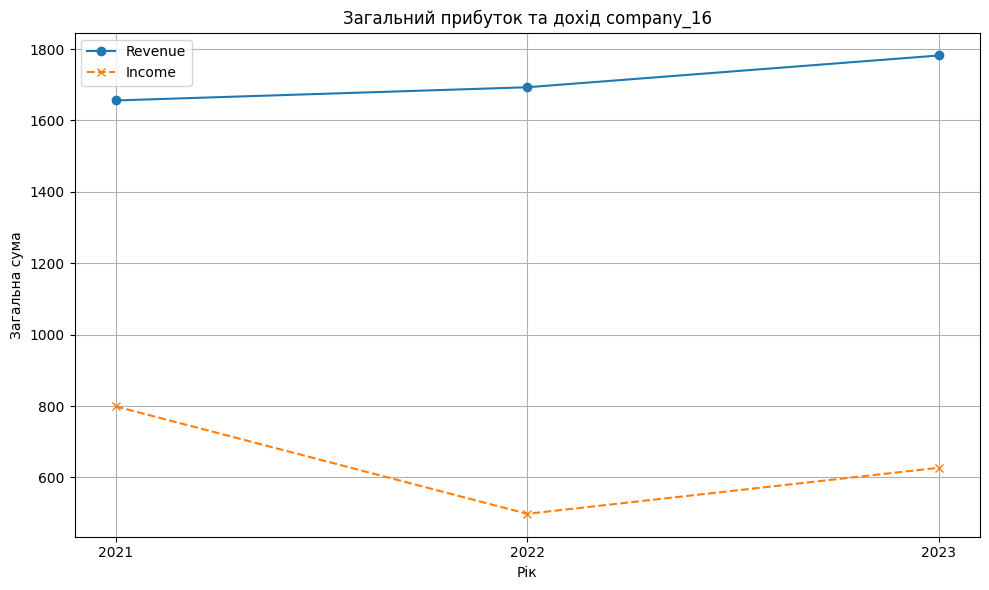

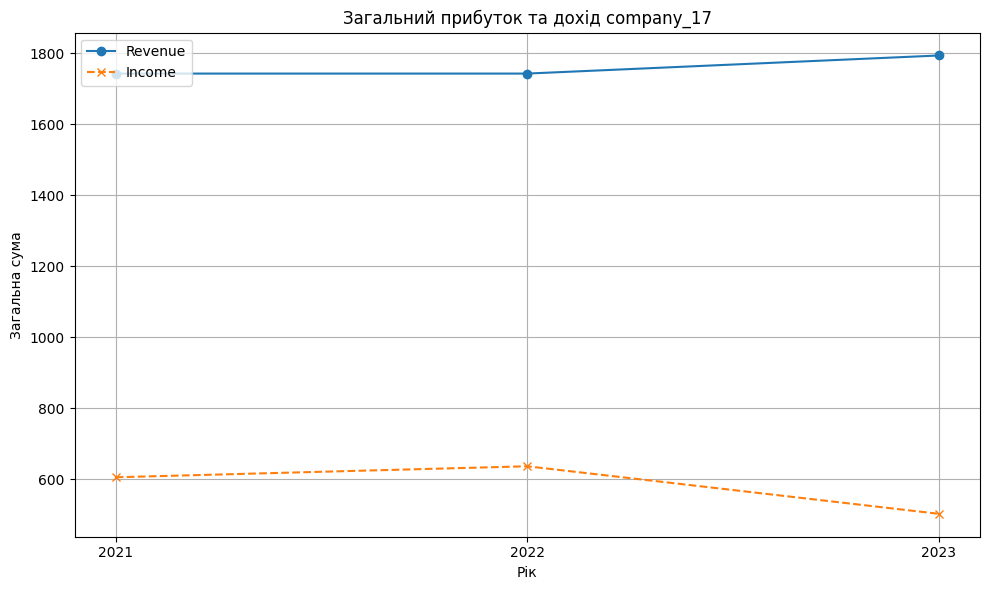

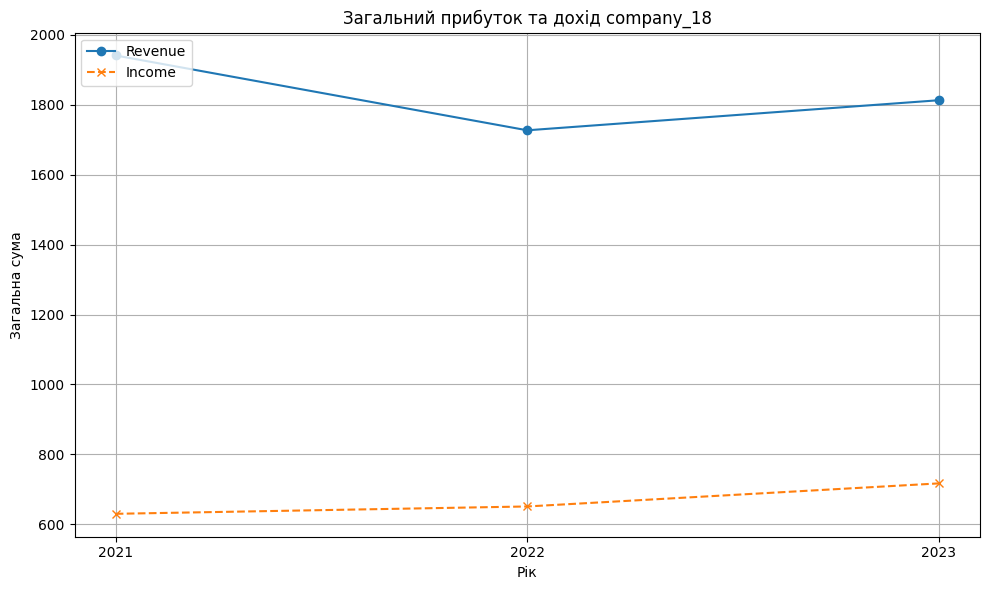

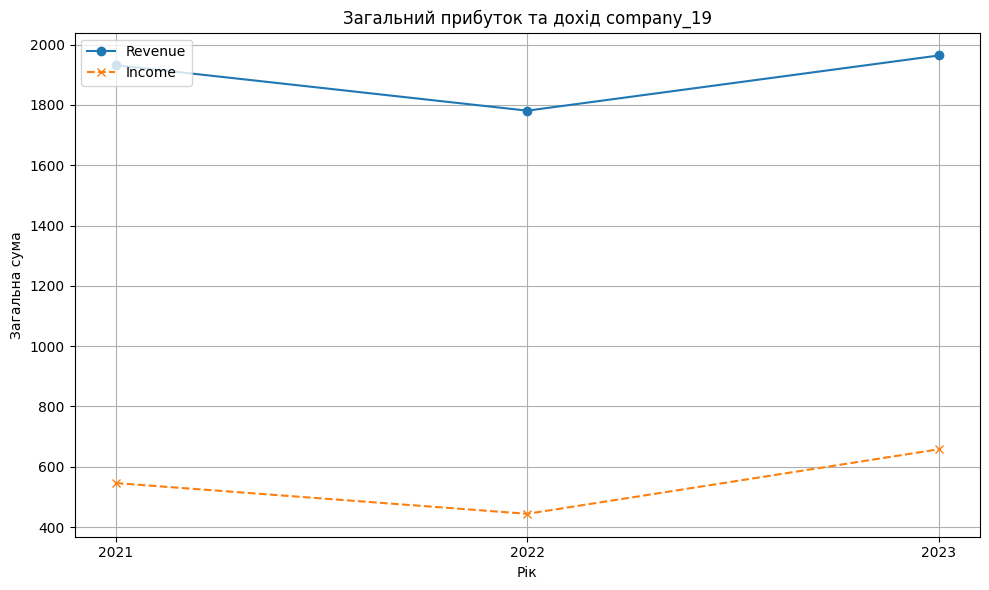

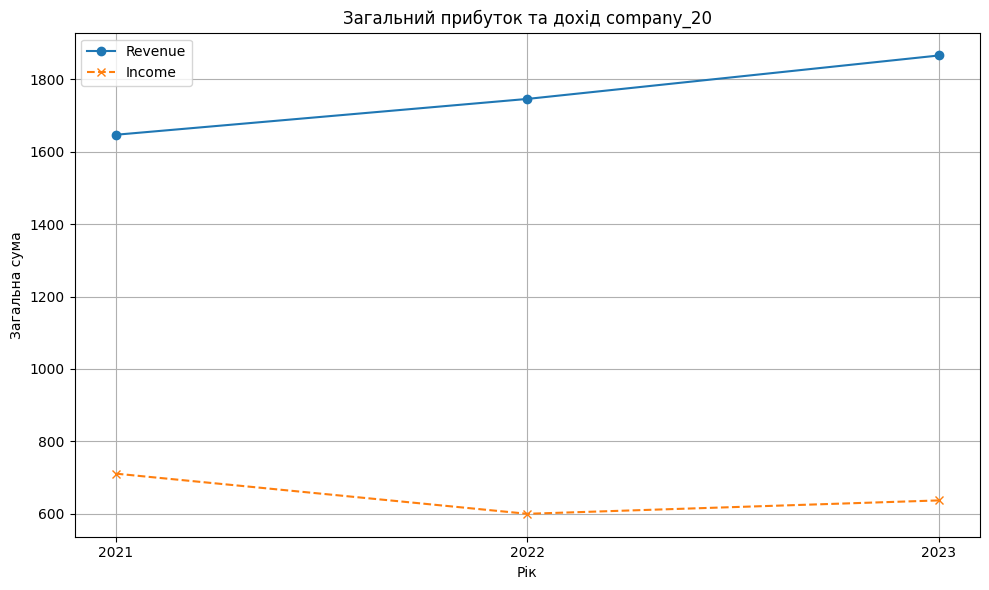

In [67]:
summary = df.groupby(['company', 'year']).agg({
  'revenue': 'sum',
  'income': 'sum'
}).reset_index()


for company in companies:
  company_summary = summary[summary['company'] == company]
    
  plt.figure(figsize=(10, 6))
  plt.plot(company_summary['year'], company_summary['revenue'], label='Revenue', marker='o')
  plt.plot(company_summary['year'], company_summary['income'], label='Income', linestyle='--', marker='x')
  plt.title(f'Загальний прибуток та дохід {company}')
  plt.xlabel('Рік')
  plt.ylabel('Загальна сума')
  plt.legend(loc='upper left')
  plt.grid(True)
  plt.xticks([2021, 2022, 2023])
  plt.tight_layout()
  plt.show()

In [68]:
total_revenue = summary.groupby('company')['revenue'].sum()

top_10_companies = total_revenue.nlargest(10)

print("Топ 10 компаній за прибутком:")
for company, revenue in top_10_companies.items():
  print(f"{company}: {revenue}")

Топ 10 компаній за прибутком:
company_15: 5709
company_19: 5677
company_10: 5648
company_12: 5610
company_13: 5561
company_11: 5485
company_18: 5481
company_1: 5465
company_3: 5432
company_14: 5343


In [69]:
correlation_dict = {}
for company in companies:
    company_summary = summary[summary['company'] == company]
    correlation = company_summary['revenue'].corr(company_summary['income'])
    correlation_dict[company] = correlation

for company, correlation in correlation_dict.items():
    print(f"Correlation {company}: {correlation:}")


Correlation company_1: -0.7437906922363223
Correlation company_2: 0.4920179240656835
Correlation company_3: 0.5670529544080303
Correlation company_4: 0.9983452978746727
Correlation company_5: -0.7829337843417278
Correlation company_6: -0.15365704400675473
Correlation company_7: -0.8404947550198206
Correlation company_8: 0.40883692965095214
Correlation company_9: 0.01277219415927479
Correlation company_10: -0.997573290159508
Correlation company_11: -0.9712640813812504
Correlation company_12: 0.6559942311508219
Correlation company_13: 0.964625977237573
Correlation company_14: 0.4373587489112738
Correlation company_15: 0.5658324497986534
Correlation company_16: -0.36346175601612946
Correlation company_17: -0.9752838675130711
Correlation company_18: -0.33935424548401066
Correlation company_19: 0.9263754189825023
Correlation company_20: -0.6118666990094016


In [70]:
top_10_correlation_companies = sorted(correlation_dict, key=correlation_dict.get, reverse=True)[:10]
print("Топ 10 найкращих компаній за кореляцією:")
for company in top_10_correlation_companies:
    print(f"{company}: {correlation_dict[company]:}")

Топ 10 найкращих компаній за кореляцією:
company_4: 0.9983452978746727
company_13: 0.964625977237573
company_19: 0.9263754189825023
company_12: 0.6559942311508219
company_3: 0.5670529544080303
company_15: 0.5658324497986534
company_2: 0.4920179240656835
company_14: 0.4373587489112738
company_8: 0.40883692965095214
company_9: 0.01277219415927479


In [71]:
top_10_correlation_companies = sorted(correlation_dict, key=correlation_dict.get)[:10]
print("Топ 10 найгірших компаній за кореляцією:")
for company in top_10_correlation_companies:
    print(f"{company}: {correlation_dict[company]:}")

Топ 10 найгірших компаній за кореляцією:
company_10: -0.997573290159508
company_17: -0.9752838675130711
company_11: -0.9712640813812504
company_7: -0.8404947550198206
company_5: -0.7829337843417278
company_1: -0.7437906922363223
company_20: -0.6118666990094016
company_16: -0.36346175601612946
company_18: -0.33935424548401066
company_6: -0.15365704400675473


In [72]:
company_summary = {}
for data in company_data:
    company_name = data['company']
    if company_name not in company_summary:
        company_summary[company_name] = {'revenue': []}
    company_summary[company_name]['revenue'].append(data['revenue'])

def calculate_average_profit_growth(revenue_data):
    first_year_profit = revenue_data[0]
    last_year_profit = revenue_data[-1]
    profit_growth = last_year_profit - first_year_profit
    return profit_growth

average_profit_growth = {}
for company, data in company_summary.items():
    profit_growth = calculate_average_profit_growth(data['revenue'])
    average_profit_growth[company] = profit_growth

company_with_highest_growth = max(average_profit_growth, key=average_profit_growth.get)
highest_growth_value = average_profit_growth[company_with_highest_growth]

print(f"Компанія з найвищим середнім зростом: {company_with_highest_growth}, зріст: {highest_growth_value}")

Компанія з найвищим середнім зростом: company_10, зріст: 74
